### 1. Understand data

From data sources, there are a very simple description about dataset    
- listings, including full descriptions and average review score
- reviews, including unique id for each reviewer and detailed comments
- calendar, including listing id and the price and availability for that day    

This section will explore more about these three files, then get general idea of this dataset's potential. 



In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import datetime

In [2]:
listings = pd.read_csv('./listings.csv')
reviews = pd.read_csv('./reviews.csv')
calendar = pd.read_csv('./calendar.csv')

In [3]:
print('listings.shape',  listings.shape)
print('reviews.shape',  reviews.shape)
print('calendar.shape',  calendar.shape)

listings.shape (3818, 92)
reviews.shape (84849, 6)
calendar.shape (1393570, 4)


####  1.1 Understand calendar 

In [4]:
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [5]:
# check missing value 
calendar.isnull().mean(axis=0).sort_values(ascending=False)

price         0.32939
available     0.00000
date          0.00000
listing_id    0.00000
dtype: float64

In [6]:
# checking the date start and end time
calendar.date.min(), calendar.date.max()

('2016-01-04', '2017-01-02')

In [7]:
# check if start date and end date for each listing are identical.
start_date = calendar[['date','listing_id']].groupby('listing_id').min().drop_duplicates()
end_date = calendar[['date','listing_id']].groupby('listing_id').max().drop_duplicates()
start_date.values, end_date.values

(array([['2016-01-04']], dtype=object), array([['2017-01-02']], dtype=object))

In [8]:
start_date.values

array([['2016-01-04']], dtype=object)

In [9]:
# how many records of each listing
listings_calendar_count = calendar.groupby('listing_id').count()['date']
listings_calendar_count.drop_duplicates()

listing_id
3335    365
Name: date, dtype: int64

In [10]:
# how many unique listing_id
calendar.listing_id.nunique()

3818

In [11]:
# what's the relation between available and price 
calendar.available.value_counts()

t    934542
f    459028
Name: available, dtype: int64

In [12]:
calendar.price.dropna().shape

(934542,)

In [13]:
# What the ratio of nan values of price when available == 't' 
calendar.price[calendar.available == 't'].isna().mean()

0.0

In [14]:
# What the ratio of nan values of price when available == 'f' 
calendar.price[calendar.available == 'f'].isna().mean()

1.0

> Calendar have price and available records for 3818 listings in 365 days from 2016-01-04 to 2017-01-02.

#### 1.2 understand reviews



In [15]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [16]:
reviews.shape

(84849, 6)

In [17]:
# check missing values in columns
reviews.isnull().mean(axis=0).sort_values(ascending=False)

comments         0.000212
reviewer_name    0.000000
reviewer_id      0.000000
date             0.000000
id               0.000000
listing_id       0.000000
dtype: float64

In [18]:
# reviews start and end date
reviews.date.min(), reviews.date.max()

('2009-06-07', '2016-01-03')

In [19]:
# how many unique listings in reviews
reviews.listing_id.nunique()

3191

In [20]:
# how many nuique users
reviews.reviewer_id.nunique()

75730

In [21]:
# Does comments has null value?
reviews[reviews.comments.isnull()].head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
11034,461567,11614247,2014-04-09,12120141,Abbey,NaN
15383,9460,10563024,2014-02-24,12498029,Debra,NaN
15914,2906694,48629316,2015-09-27,44218980,Anush,NaN
16097,910784,9950520,2014-01-21,179481,Enrico,NaN
27280,10695,52378,2010-06-13,105412,Wei,NaN


> Reviews have review records from 2009-06-07 to 2016-01-03 for 3191 listings.

#### 1.3 understand listings


In [22]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_colwidth', 50)
print(listings.shape)
listings.head()

(3818, 92)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazi

In [23]:
# Since listing has 92 columns, classify columns into groups 
all_cols = listings.columns.values.tolist()

listing_info = all_cols[:16]
host_info = all_cols[16:34]
location_info = all_cols[34:48]
room_detail = all_cols[48:57]
price_and_calendar = all_cols[57:73] + all_cols[-1:]
reviews_summary = all_cols[73:83]
miscellaneous = all_cols[83:-1]

print("listing_info\n", listing_info)
print("host_info\n", host_info)
print("location_info\n", location_info)
print("room_detail\n", room_detail)
print("price_and_calendar\n", price_and_calendar)
print("reviews_summary\n", reviews_summary)
print("miscellaneous\n", miscellaneous)

listing_info
 ['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space', 'description', 'experiences_offered', 'neighborhood_overview', 'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url']
host_info
 ['host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified']
location_info
 ['street', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market', 'smart_location', 'country_code', 'country', 'latitude', 'longitude', 'is_location_exact']
room_detail
 ['property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet']
price_and_calendar
 ['price

In [24]:
# check each null value for each column
listings.isnull().mean(axis=0).sort_values(ascending=False)

license             1.000000
square_feet         0.974594
monthly_price       0.602672
security_deposit    0.511262
weekly_price        0.473808
                      ...   
accommodates        0.000000
bed_type            0.000000
amenities           0.000000
price               0.000000
id                  0.000000
Length: 92, dtype: float64

In [25]:
# what date does this data scraped?
listings.last_scraped.drop_duplicates()

0    2016-01-04
Name: last_scraped, dtype: object

In [26]:
# check scrape id
listings.scrape_id.drop_duplicates()

0    20160104002432
Name: scrape_id, dtype: int64

In [27]:
# how many unqiue listings in this dataset?
listings.id.nunique()

3818

In [28]:
# how many unique host in this dataset?
listings.host_id.nunique()

2751

> listings have very detail information for 3818 listings. There are 2751 host owns 2818 listings. This infomation is scraped at 2016-01-04

### 1.1.4 Summary of data understanding
Here are the info telled by previous analysis:
1. Calendar dataset have price and available records for 3818 listings in 365 days from 2016-01-04 to 2017-01-02.    
2. Reviews dataset have review records from 2009-06-07 to 2016-01-03 for 3191 listings.    
3. Listings dateset was scraped at 2016-01-04. It has very detail information for 3818 listings. There are 2751 host owns 3818 listings.  

Standing at time point 2016-01-04, listings.csv is the lastest detail information of each listing. reviews.csv is the history which explain the past. calendar.csv is a plan for the future year.

### 2. Set up problems

Here are problems I'd liked to figure out:
1. How the price fluctuates in a year and what's the average price?     
2. Is there a general upward trend of both new Airbnb listings and total Airbnb visitors to Seattle?     
3. What's the percentage of listing with no tenants at all?       
4. What is the average value of number of orders per each listings in 2015?
5. How to become a successful host?     


### 3. Analyze, Model, and Visualize

#### 3.1 Problem 1:  How the price fluctuates in a year and what's the average price?    
This can be solved by calender. Calendar.csv have all 3818 listings' price and available information in from 2016-01-04 to 2017-01-02.

In [29]:
# clean dataframe calendar as follows:
# 1. change price into float type
# 2. re-encode available into numeric type

def transfer_price(price_str):
    if type(price_str) != str:
        return price_str
    else:
        return float(price_str[1:].replace(",",""))
calendar['available'] = calendar.available.map({'f':0, 't':1})
calendar.loc[:, 'price'] = calendar.price.apply(lambda x: transfer_price(x))


In [30]:
# compute mean price and vacancy_rate
mean_price = calendar.groupby('date').mean()[['price']]
vacancy_rate = calendar.groupby('date').mean()['available']

Text(0.5, 1.0, "Seattle listings' prices and vacancy_rate in 2016")

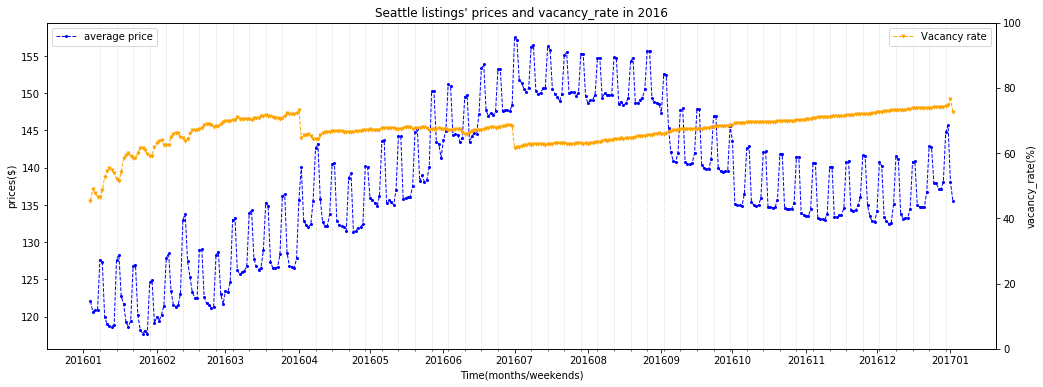

In [31]:
# plot data the trends of mean_price and vacancy_rate

# compute value for ticks. The first date of each month will be the
# major ticks and each weekend will be the minor ticks.
month = []
for elem in ['2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01',
             '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01',
             '2016-09-01', '2016-10-01', '2016-11-01', '2016-12-01',
             '2017-01-01']:
    date = datetime.datetime.strptime(elem, "%Y-%m-%d")
    month.append(mpl.dates.date2num(date))

weekends = []
start = datetime.datetime(2016, 1, 4)
stop = datetime.datetime(2017, 1, 3)
delta = datetime.timedelta(1)
dates = mpl.dates.drange(start, stop, delta)
for day in dates:
    weekday = mpl.dates.num2date(day).isoweekday()
    if weekday == 5:
        weekends.append(day)

# draw graph with double vertical axis
fig, ax = plt.subplots(1, 1, figsize=(17, 6))
ax1 = ax.twinx()

# plot mean price, the y-axis should be on the left
date_format = mpl.dates.DateFormatter('%Y%m')
ax.xaxis.set_major_formatter(date_format)
ax.plot(dates, mean_price.price, 'bo--', linewidth=1, markersize=2)
ax.set_xticks(month)
ax.set_xticks(weekends, minor=True)
ax.set_xlabel('Time(months/weekends)')
ax.set_ylabel('prices($)')
ax.legend(['average price'], loc="upper left")

# plot vacancy rate, the y-axis should be on the right
ax1.plot(dates, vacancy_rate.values*100, color='orange', marker='v',
         linestyle='--', linewidth=1, markersize=3)
ax1.set_ylim(0, 100)
ax1.set_ylabel('vacancy_rate(%)')
ax1.legend(['Vacancy rate'], loc="best")

ax.grid(True, 'minor', 'x', linestyle=':', linewidth=1, alpha=0.5)
ax.set_title("Seattle listings' prices and vacancy_rate in 2016")

In [32]:
# compute the overall average price
overall_avg = np.mean(mean_price)
overall_avg

price    137.901783
dtype: float64

#### 3.2 Problem 2： Is there a general upward trend of both new Airbnb listings and total Airbnb visitors to Seattle?





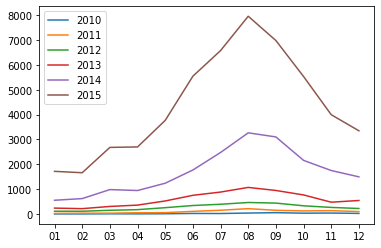

In [33]:
# find out number of reviews per month in year clcle
reviews['year'] = reviews.date.str.slice(0,4)
reviews['month'] = reviews.date.str.slice(5,7)

for year in [ '2010', '2011', '2012', '2013', '2014', '2015']:
    reviews_per_mon = reviews[reviews.year == year].groupby(['month']).count()['id'].sort_index()
    plt.plot(reviews_per_mon.index, reviews_per_mon.values)
    plt.legend([ '2010', '2011', '2012', '2013', '2014', '2015'])

Text(0.5, 1.0, 'Airbnb visitors in Seattle')

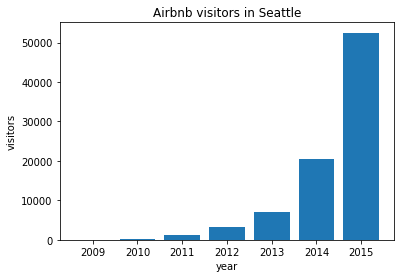

In [34]:
# number of visitors in each year
reviews_per_year = reviews.groupby(['year']).count()['listing_id'].sort_index().drop('2016')

plt.bar(reviews_per_year.index, reviews_per_year.values)
plt.ylabel('visitors')
plt.xlabel('year')
plt.title('Airbnb visitors in Seattle')

Text(0.5, 1.0, 'Airbnb new listings in Seattle')

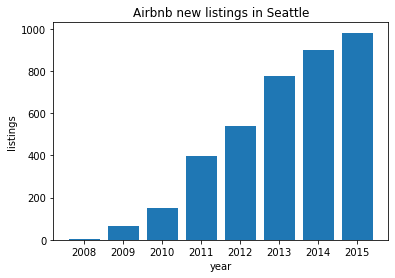

In [35]:
listings['host_year'] = listings.host_since.str.slice(0,4)

new_listings_per_year = listings[['host_year','id']].groupby(['host_year']).count()
new_listings_per_year.drop('2016', inplace=True)
plt.bar(new_listings_per_year.index,new_listings_per_year['id'].values)
plt.ylabel('listings')
plt.xlabel('year')
plt.title('Airbnb new listings in Seattle')

Text(0.5, 1.0, 'Airbnb new listings in Seattle')

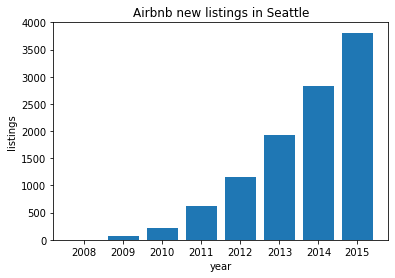

In [36]:
# accumulated listings in each year
totoal_listings_per_year = new_listings_per_year.cumsum()
plt.bar(totoal_listings_per_year.index,totoal_listings_per_year['id'].values)
plt.ylabel('listings')
plt.xlabel('year')
plt.title('Airbnb new listings in Seattle')

Text(0.5, 1.0, 'Amount of vistors and listings (2009-2015)')

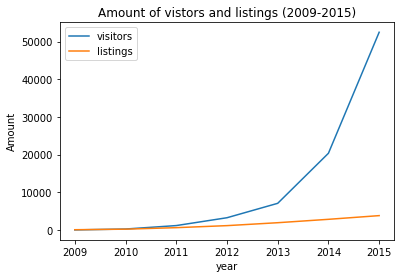

In [37]:
# compare the growth of visitors and listings throug 2009 to 2015
plt.plot(reviews_per_year.index, reviews_per_year.values)
plt.plot(totoal_listings_per_year.drop('2008').index,
         totoal_listings_per_year['id'].drop('2008').values)
plt.legend(['visitors', 'listings'])
plt.ylabel('Amount')
plt.xlabel('year')
plt.title('Amount of vistors and listings (2009-2015)')

#### 3.3 Problem 3 : What's the percentage of listings with no tenants at all?

Consider listings which have no review records as no tenants.

In [38]:
# check if all listing_id in reviews.csv is in listings.csv
set(reviews.listing_id.drop_duplicates()) - set(listings.id.drop_duplicates())

set()

In [39]:
# total percentage of listing with no tenants at all 
1-reviews.listing_id.nunique()/ listings.id.nunique()

0.16422210581456265

#### 3.4 Problem 4: What is the average value of number of orders per each listings in 2015?

Consider each review record as a represent of an order. When compute average value, should take listings without orders into account.

In [40]:
listings_orders_count_2015 = reviews[reviews.year == '2015'].groupby('listing_id').count()

In [41]:
no_tenant_listings = set(listings.id) - set(listings_orders_count_2015.index)

In [42]:
listings_without_orders = pd.Series(index=no_tenant_listings, data=[0]*len(no_tenant_listings))

In [43]:
integrated_listings_orders_count = pd.concat([listings_without_orders, listings_orders_count_2015['comments']])

In [44]:
integrated_listings_orders_count.describe()

count    3818.000000
mean       13.747250
std        18.471732
min         0.000000
25%         1.000000
50%         6.000000
75%        19.000000
max       142.000000
dtype: float64

> The average value of number of orders per each listings in 2015 is 13.75.

#### 3.5 Problem 5  
How to become a successful host?          
I'll use following two questions to answer the questioin:    
1. What does an popupar room look like?
2. What is the best time to start?

##### 3.5.1 What does an popupar room look like?
In the part, I'll try to look at each attribute in room_detail to find an way to define the popupar room

In [45]:
# Combine listings and reviews for further analysis

reviews_extend = pd.merge(listings[room_detail+['id']], reviews, left_on='id', right_on='listing_id')

In [46]:
# Here are the attributes to analyze

room_detail

['property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',
 'square_feet']

In [47]:
# count each room_type
reviews_extend[['room_type', 'listing_id']].groupby(['room_type']).count()

,listing_id
room_type,
Entire home/apt,52465
Private room,30870
Shared room,1514


In [48]:
# count each room_type in year 2015
reviews_extend[reviews_extend.date.str.slice(0,4) == '2015']\
[['room_type', 'listing_id']].groupby(['room_type']).count()



,listing_id
room_type,
Entire home/apt,32990
Private room,18448
Shared room,1055


In [49]:
# count each room_type in year 2014
reviews_extend[reviews_extend.date.str.slice(0,4) == '2014']\
[['room_type', 'listing_id']].groupby(['room_type']).count()

,listing_id
room_type,
Entire home/apt,12486
Private room,7569
Shared room,310


In [50]:
# count by accommodates
reviews_extend[['listing_id', 'accommodates']].groupby(['accommodates']).count()['listing_id'].sort_values(ascending=False)

accommodates
2     42821
4     16041
3     10170
6      5580
1      3542
5      3221
8      1501
7       956
10      520
12      229
9        98
14       83
16       48
11       20
15       19
Name: listing_id, dtype: int64

In [51]:
# count by bedrooms
reviews_extend[['listing_id', 'bedrooms']].groupby(['bedrooms']).count()['listing_id'].sort_values(ascending=False)

bedrooms
1.0    61399
2.0    10593
0.0     8113
3.0     3593
4.0      569
5.0      205
6.0       82
7.0        5
Name: listing_id, dtype: int64

In [52]:
# count by beds
reviews_extend[['listing_id', 'beds']].groupby(['beds']).count()['listing_id'].sort_values(ascending=False)

beds
1.0     54886
2.0     18522
3.0      7785
4.0      2421
5.0       576
6.0       264
7.0       209
9.0       103
8.0        56
15.0       18
10.0        9
Name: listing_id, dtype: int64

In [53]:
# count by bed_type
reviews_extend[['listing_id', 'bed_type']].groupby(['bed_type']).count()['listing_id'].sort_values(ascending=False)

bed_type
Real Bed         81625
Futon             1714
Pull-out Sofa     1064
Airbed             383
Couch               63
Name: listing_id, dtype: int64

In [54]:
# Deal with amenities and count number of amenities of each listings 
reviews_extend['amenities_list'] = reviews_extend.amenities.apply(lambda x: x.strip(' {}').split(','))

reviews_extend['amenities_count'] = reviews_extend['amenities_list'].apply(lambda x: len(x))

(array([  566.,  1848.,  8521., 19228., 22637., 17182.,  8993.,  4195.,
         1498.,   181.]),
 array([ 1. ,  3.9,  6.8,  9.7, 12.6, 15.5, 18.4, 21.3, 24.2, 27.1, 30. ]),
 <a list of 10 Patch objects>)

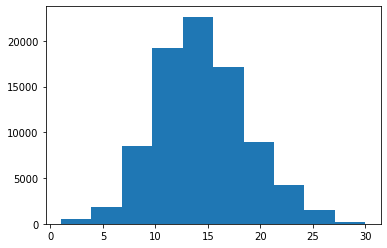

In [55]:
plt.hist(reviews_extend['amenities_count'])

In [56]:
reviews_extend['amenities_count'].describe()

count    84849.000000
mean        14.406817
std          4.533685
min          1.000000
25%         11.000000
50%         14.000000
75%         17.000000
max         30.000000
Name: amenities_count, dtype: float64

> The bottom 75% listings have no more than 17 amenities. If listings have 18 amenities, it could be in the top 25%. 

In [57]:
# Find the top 18 ammenities. The more listings have an amenity the more valueable the amenity is .

amenities_set=set([])
for amenities in reviews_extend['amenities_list'].values:
    for elem in amenities:
        amenities_set.add(elem)
amenities_set.remove('')

amenities_cols = []
for amenity in amenities_set:
    amenities_cols.append(amenity)
    reviews_extend[amenity] = reviews_extend['amenities_list'].apply(
        lambda x: amenity in x).map({True:1, False:0})

amenities_rank = reviews_extend[amenities_cols].mean(axis=0).sort_values(ascending=False)
top18_amenities = amenities_rank[:18]

In [58]:
top18_amenities

"Wireless Internet"             0.986046
Heating                         0.977949
Essentials                      0.872043
"Smoke Detector"                0.866528
Kitchen                         0.856875
Shampoo                         0.778241
Internet                        0.761600
Dryer                           0.691935
Washer                          0.684487
TV                              0.656401
"Carbon Monoxide Detector"      0.654940
"Fire Extinguisher"             0.598310
"Free Parking on Premises"      0.561173
"First Aid Kit"                 0.500513
"Family/Kid Friendly"           0.495032
"Cable TV"                      0.365850
"Pets live on this property"    0.288949
"Hair Dryer"                    0.235795
dtype: float64

Text(0.5, 1.0, 'Top 18 most valuable amenities')

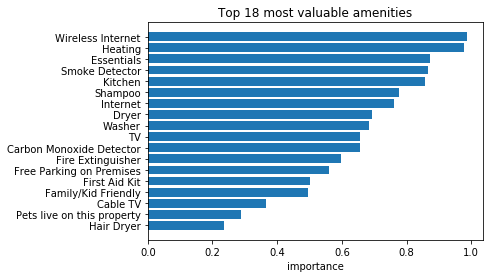

In [59]:
plt.barh(top18_amenities.sort_values().index.str.strip('"'), top18_amenities.sort_values().values)
plt.xlabel('importance')
plt.title('Top 18 most valuable amenities')

> Use ammenities to define room could be a good idea!

##### 3.5.2  What is the best time to start?

This section will use the time to get to 1st transaction as the quantitative index. The shorter, the better.

In [60]:
# Time to 1st transation is estimated by (reviews.date - listings.host_since).
# But if a host has more than 1 listings, we don't known which listings is the first.
# So only keep the records which host_count==1 to .

listings_host1 = listings[listings.host_listings_count==1]
listings_host1 = listings_host1[listings_host1.first_review >= listings_host1.host_since ]
waiting_days = pd.to_datetime(listings_host1.first_review) - pd.to_datetime(listings_host1.host_since)
waiting_days_array = waiting_days.astype(str).str.split(" ")
waiting_days = waiting_days_array.apply(lambda x:x[0])
waiting_days.replace("NaT", np.nan, inplace=True)
waiting_days = waiting_days.astype(float)
listings_host1['waiting_days'] = waiting_days

In [61]:
listings_host1['host_since_month'] = listings_host1['host_since'].str.slice(0,7)

time_to_1st_transaction_describe  = listings_host1[['host_since_month', 'waiting_days']].groupby('host_since_month').describe()

In [62]:
def plot_time_to_transaction(data, stat='min'):
    data_2012 = data['waiting_days'][stat].loc['2012-01': '2012-12']
    data_2013 = data['waiting_days'][stat].loc['2013-01': '2013-12']
    data_2014 = data['waiting_days'][stat].loc['2014-01': '2014-12']
    data_2015 = data['waiting_days'][stat].loc['2015-01': '2015-12']

    plt.plot(range(1,13), data_2012.values)
    plt.plot(range(1,13), data_2013.values)
    plt.plot(range(1,13), data_2014.values)
    plt.plot(range(1,13), data_2015.values)
    plt.legend(['2012','2013', '2014', '2015'])

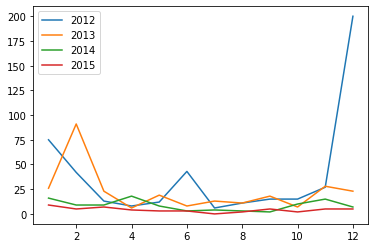

In [63]:
plot_time_to_transaction(time_to_1st_transaction_describe, stat='min')

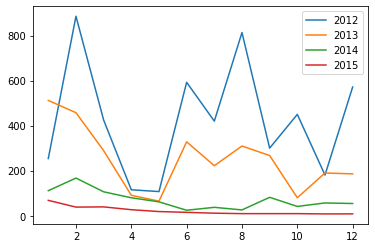

In [64]:
plot_time_to_transaction(time_to_1st_transaction_describe, stat='25%')

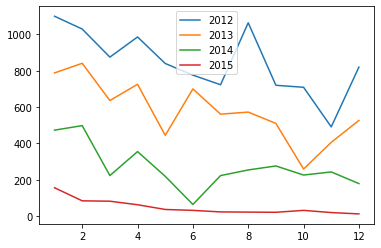

In [65]:
plot_time_to_transaction(time_to_1st_transaction_describe, stat='50%')

> use median value is much more reasonable than the others

Text(0.5, 1.0, ' Median time to reach the first transaction( 2012-2015 ) ')

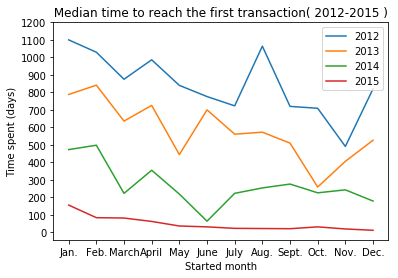

In [66]:
# re-plot the graph for 50%, add details
data_2012 = time_to_1st_transaction_describe['waiting_days']['50%'].loc['2012-01': '2012-12']
data_2013 = time_to_1st_transaction_describe['waiting_days']['50%'].loc['2013-01': '2013-12']
data_2014 = time_to_1st_transaction_describe['waiting_days']['50%'].loc['2014-01': '2014-12']
data_2015 = time_to_1st_transaction_describe['waiting_days']['50%'].loc['2015-01': '2015-12']


plt.plot(range(1,13), data_2012.values)
plt.plot(range(1,13), data_2013.values)
plt.plot(range(1,13), data_2014.values)
plt.plot(range(1,13), data_2015.values)
plt.legend(['2012','2013', '2014', '2015'], loc='upper right')
plt.xticks(range(1,13), 
           labels=['Jan.', 'Feb.', 'March', 'April', 'May', 'June','July', 'Aug.','Sept.','Oct.', 'Nov.', 'Dec.'])
plt.yticks(range(0, 1201, 100))

plt.xlabel('Started month')
plt.ylabel('Time spent (days)')
plt.title(' Median time to reach the first transaction( 2012-2015 ) '  )